In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import numpy as np
from random import randint

plt.style.use(["Solarize_Light2"])
plt.rcParams["axes.edgecolor"] = "#66818c"
plt.rcParams["axes.facecolor"] = "#263238"
plt.rcParams["figure.facecolor"] = "#263238"
plt.rcParams["grid.color"] = "#3f575b"
plt.rcParams["xtick.color"] = "#bfd5dd"
plt.rcParams["ytick.color"] = "#bfd5dd"
plt.rcParams["text.color"] = "#bfd5dd"
plt.rcParams["axes.labelcolor"] = "#bfd5dd"

engine = create_engine("postgresql+psycopg2://{}:{}@{}:{}/{}".format())
table_name = "flat"

In [2]:
query = """ SELECT owner_type,
                   area,
                   area_kitchen,
                   area_living,
                   floor,
                   rooms,
                   layout,
                   height,
                   bathrooms,
                   window_types,
                   balconies,
                   condition,
                   price,
                   type,
                   year,
                   material,
                   floors,
                   garbage_chute,
                   heating_type
            FROM {}
            INNER JOIN building ON flat.building_id = building.id
        """.format(table_name)
df = pd.read_sql(query, engine)
df.loc[:, "ppm"] = df.price / df.area
df.drop("price", axis=True, inplace=True)

In [3]:
df.loc[:, "window_0"] = df.window_types.apply(lambda i: None if i is None else i[0])
df.loc[:, "window_1"] = df.window_types.apply(lambda i: None if i is None else i[1])
df[["window_1", "window_0"]] = df[["window_1", "window_0"]].fillna(0)
df.drop("window_types", axis=True, inplace=True)
df.loc[:, "bathrooms_0"] = df.bathrooms.apply(lambda i: None if i is None else i[0])
df.loc[:, "bathrooms_1"] = df.bathrooms.apply(lambda i: None if i is None else i[1])
df[["bathrooms_0", "bathrooms_1"]] = df[["bathrooms_0", "bathrooms_1"]].fillna(0)
df.drop("bathrooms", axis=True, inplace=True)
df.loc[:, "balconies_0"] = df.balconies.apply(lambda i: None if i is None else i[0])
df.loc[:, "balconies_1"] = df.balconies.apply(lambda i: None if i is None else i[1])
df[["balconies_0", "balconies_1"]] = df[["balconies_0", "balconies_1"]].fillna(0)
df.drop("balconies", axis=True, inplace=True)
df.loc[~df.garbage_chute.isnull() & df.garbage_chute, "garbage_chute_1"] = 1
df.loc[~df.garbage_chute.isnull() & df.garbage_chute == False, "garbage_chute_0"] = 1
df.loc[:, "garbage_chute_0"] = df.loc[:, "garbage_chute_0"].fillna(0)
df.loc[:, "garbage_chute_1"] = df.loc[:, "garbage_chute_1"].fillna(0)
df.drop("garbage_chute", axis=True, inplace=True)
for i in df.type.unique():
    if i >= .0:
        df.loc[df.type == i, "type_"+str(i)] = 1
        df.loc[:, "type_"+str(i)] = df.loc[:, "type_"+str(i)].fillna(0)
df.drop("type", axis=True, inplace=True)
for i in df.layout.unique():
    if i >= .0:
        df.loc[df.layout == i, "layout_"+str(i)] = 1
        df.loc[:, "layout_"+str(i)] = df.loc[:, "layout_"+str(i)].fillna(0)
df.drop("layout", axis=True, inplace=True)
for i in df.material.unique():
    if i >= .0:
        df.loc[df.material == i, "material_"+str(i)] = 1
        df.loc[:, "material_"+str(i)] = df.loc[:, "material_"+str(i)].fillna(0)
df.drop("material", axis=True, inplace=True)
for i in df.condition.unique():
    if i >= .0:
        df.loc[df.condition == i, "condition_"+str(i)] = 1
        df.loc[:, "condition_"+str(i)] = df.loc[:, "condition_"+str(i)].fillna(0)
df.drop("condition", axis=True, inplace=True)
for i in df.heating_type.unique():
    if i >= .0:
        df.loc[df.heating_type == i, "heating_type_"+str(i)] = 1
        df.loc[:, "heating_type_"+str(i)] = df.loc[:, "heating_type_"+str(i)].fillna(0)
df.drop("heating_type", axis=True, inplace=True)
for i in df.owner_type.unique():
    if i >= .0:
        df.loc[df.owner_type == i, "owner_type_"+str(i)] = 1
        df.loc[:, "owner_type_"+str(i)] = df.loc[:, "owner_type_"+str(i)].fillna(0)
df.drop("owner_type", axis=True, inplace=True)
print("done!")

done!


In [4]:
df = df[(df.ppm >= 80000) & (df.ppm < 1000000) & ~df.height.isnull() & (df.height > 2.4) & (df.height < 4.9) & ~df.area_kitchen.isnull() & ~df.area_living.isnull() & ~df.year.isnull() & (df.floor!=69) & (df.year > 1000)]

In [5]:
plt.figure(figsize=(30, 10))
plt.scatter(range(len(df.ppm)), df.ppm/2000)

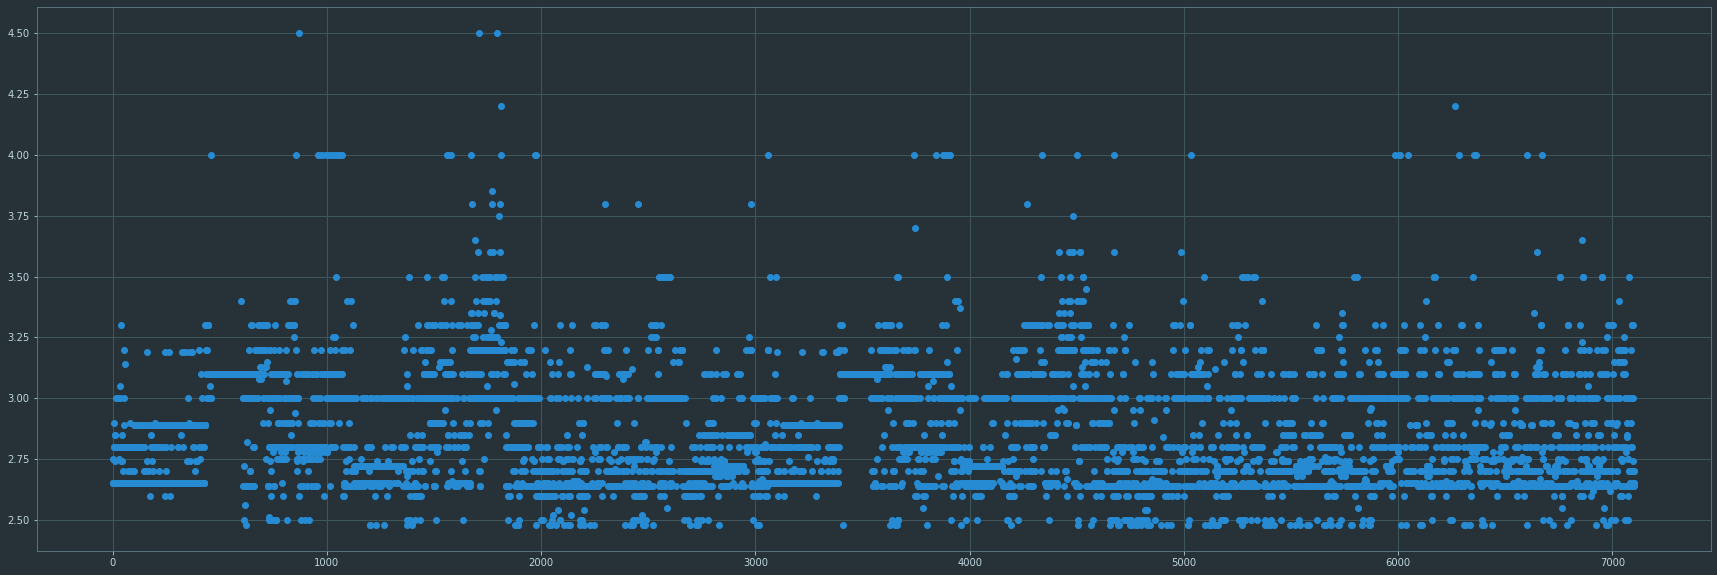

In [47]:
plt.figure(figsize=(30, 10))
plt.scatter(range(len(df.height)), df.height)

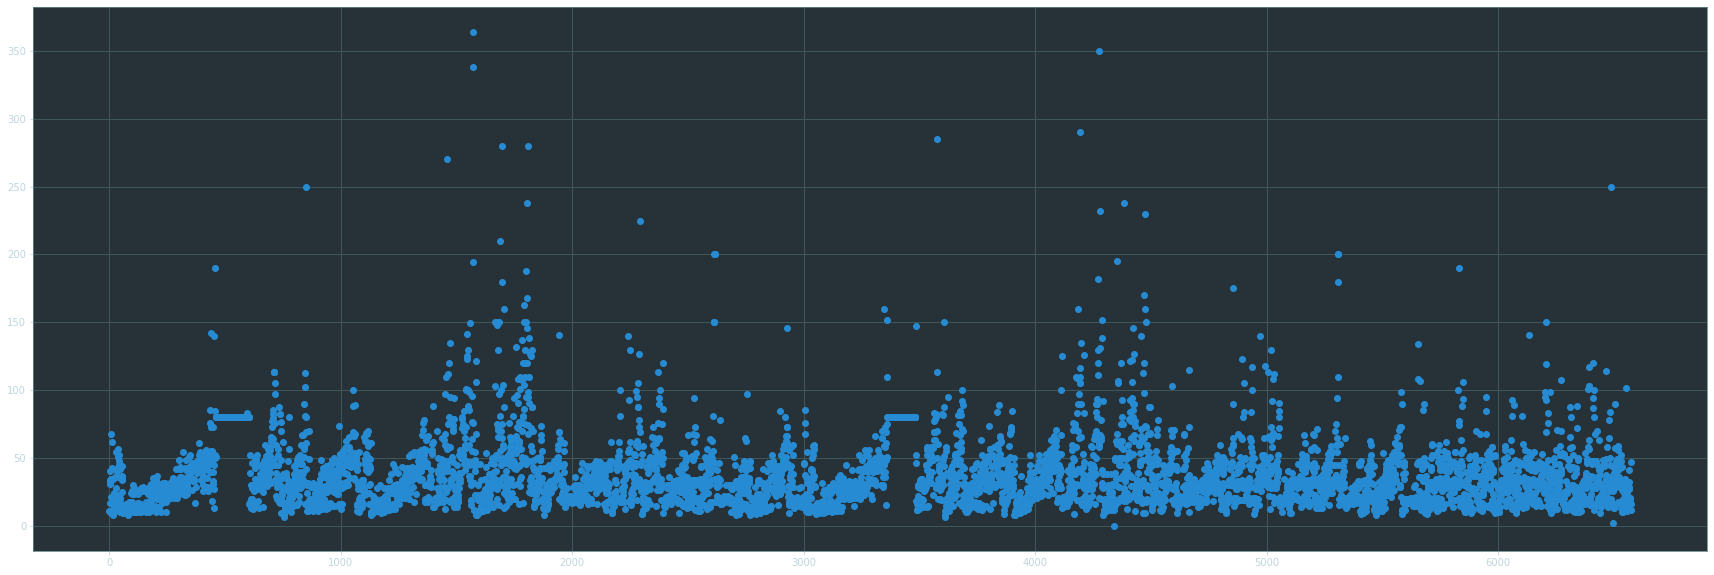

In [617]:
plt.figure(figsize=(30, 10))
plt.scatter(range(len(df.area_living)), df.area_living)

In [6]:
df.loc[:, "year"] = df["year"].astype(int)

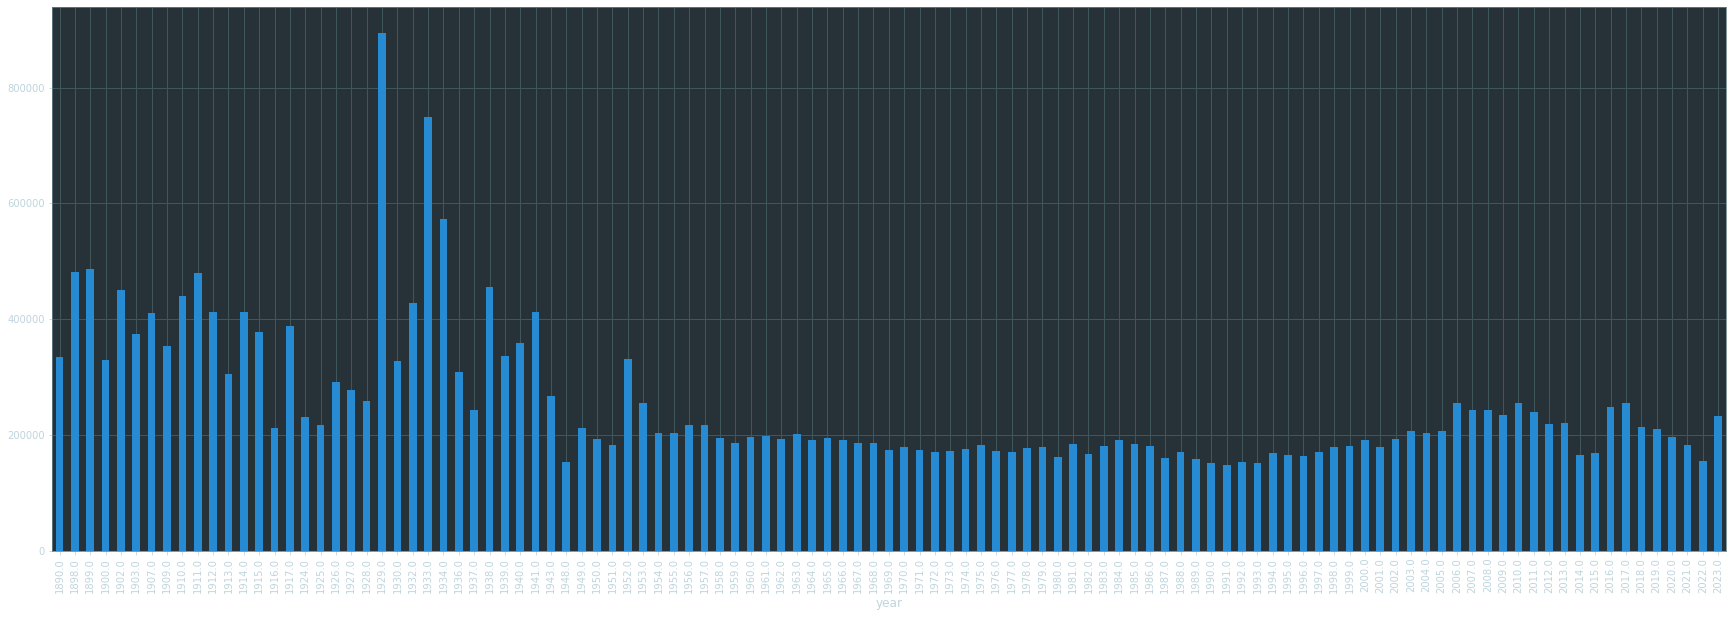

In [19]:
plt.figure(figsize=(30, 10))
df.groupby("year")["ppm"].median().plot(kind="bar");

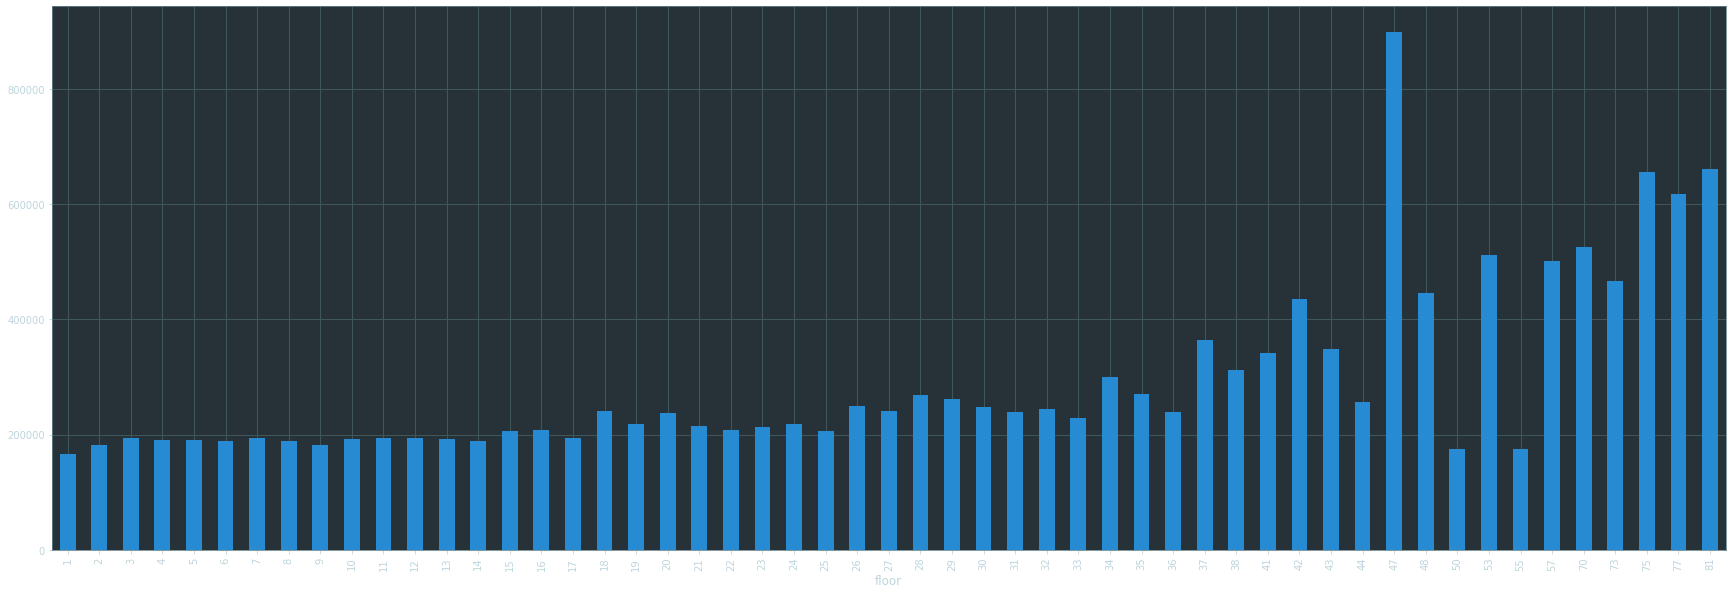

In [20]:
plt.figure(figsize=(30, 10))
df.groupby("floor")["ppm"].median().plot(kind="bar");

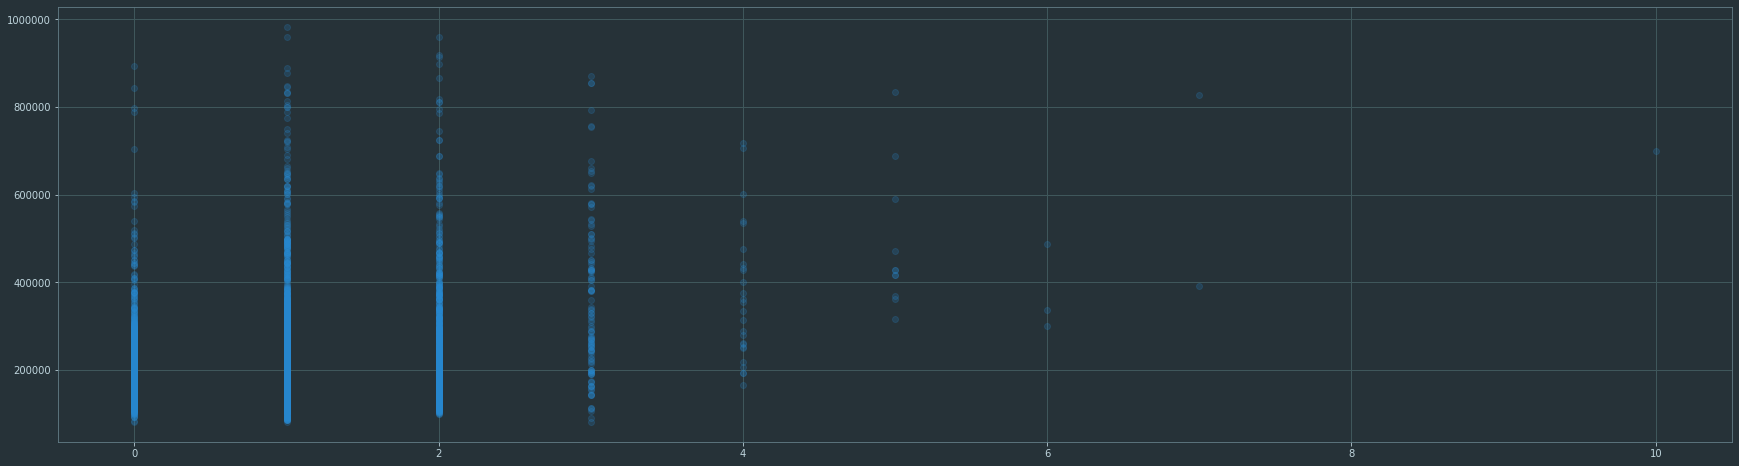

In [340]:
plt.figure(figsize=(30, 8))
plt.scatter(df.area_kitchen//10, df.ppm, alpha=.2)

In [350]:
plt.figure(figsize=(30, 8))
plt.scatter(df.floor//10, df.ppm, alpha=.2)

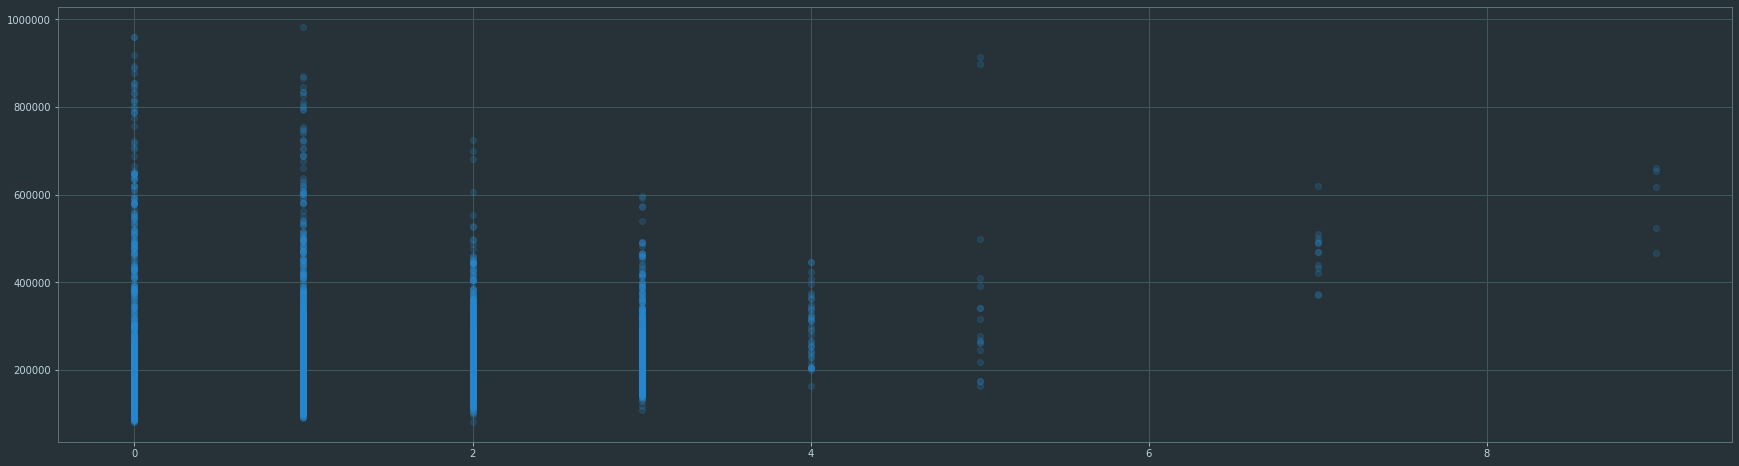

In [355]:
plt.figure(figsize=(30, 8))
plt.scatter(df.floors//10, df.ppm, alpha=.2)

In [7]:
df.loc[:, "floorgr17"] = (df.floor < 17) & (df.floor != 50) & (df.floor != 55)
df.floorgr17 = df.floorgr17.astype(int)
df.loc[:, "byless1944"] = df.year < 1944
df.byless1944 = df.byless1944.astype(int)

In [8]:
df.loc[:, "ff"] = df.floors / df.floor
# df.floorgr17 = df.floorgr17.astype(int)

In [9]:
df.loc[:, "aa"] = df.area > 1.5*df.area.mean()
df.loc[:, "aa2"] = df.area_living > df.area_living.mean()
df.loc[:, "aa3"] = df.floors > .5*df.floors.median()
df.loc[:, "aa4"] = df.height > 1.4*df.height.mean()
df.loc[:, "aa5"] = df.bathrooms_0 > df.bathrooms_0.mean()
df.loc[:, "aa6"] = df.bathrooms_1 > df.bathrooms_1.mean()
df.loc[:, "aa7"] = (df.bathrooms_0 + df.bathrooms_1) > (df.bathrooms_0 + df.bathrooms_1).mean()
df.loc[:, "aa8"] = df.rooms > df.rooms.median()
df.loc[:, "aa9"] = df.area_kitchen//10 == 0
df.loc[:, "aa10"] = df.floor//10 == 0
df.loc[:, "aa11"] = df.floors//10 > 1

In [469]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True);

In [196]:
((df.corr()["ppm"]**2)**.5).sort_values()

layout_0.0          0.000705
height              0.000866
condition_2.0       0.002089
heating_type_1.0    0.003175
material_7.0        0.004848
balconies_0         0.004931
aa4                 0.005363
material_1.0        0.008359
layout_2.0          0.009146
balconies_1         0.011245
layout_1.0          0.018313
year                0.021373
heating_type_0.0    0.024235
window_1            0.024838
heating_type_2.0    0.028707
window_0            0.033319
owner_type_0.0      0.042793
garbage_chute_1     0.052812
garbage_chute_0     0.052812
material_4.0        0.059576
material_6.0        0.070545
owner_type_2.0      0.077798
heating_type_3.0    0.078482
type_1.0            0.099239
type_0.0            0.099409
ff                  0.116738
floorgr17           0.119246
owner_type_3.0      0.119909
owner_type_1.0      0.119961
material_0.0        0.126171
condition_0.0       0.136222
floors              0.137954
material_2.0        0.146921
floor               0.149028
bathrooms_1   

In [10]:
columns = [
#     'layout_0.0',
#     'heating_type_1.0',
#     'condition_2.0',
#     'material_7.0',
#     'material_1.0',
#     'layout_2.0',
#     'layout_1.0',
#     'balconies_1',
#     'window_0',
#     'year',
#     'window_1',
#     'balconies_0',
#     'owner_type_0.0',
#     'heating_type_0.0',
#     'heating_type_2.0',
#     'floors',
#     'material_4.0',
#     'garbage_chute_1',
#     'garbage_chute_0',
#     'heating_type_3.0',
#     'owner_type_2.0',
#     'condition_0.0',
#     'material_0.0',
#     'type_1.0',
#     'owner_type_1.0',
#     'type_0.0',
#     'floor',
#     'material_2.0',
#     'owner_type_3.0',
#     'bathrooms_1',
#     'condition_1.0',
#     'material_6.0',
#     'rooms',
#     'material_3.0',
#     'area_kitchen',
#     'bathrooms_0',
#     'condition_3.0',
#     'area_living',
#     'area',
#     'height',
    'ppm'
]
X = df.drop(columns, axis=True)
y = df.ppm
X = ((X-X.mean())/X.std()).values
y = ((y-y.mean())/y.std()).values
XX = X.T.dot(X)
w = np.linalg.inv(XX).dot(X.T).dot(y)
w

array([ 2.16024332e-01, -9.90191619e-05, -8.40880434e-02,  7.83846496e-02,
       -1.34128504e-01,  4.62807095e-01, -4.15730963e-02,  3.64538686e-02,
       -1.41794742e-02,  1.01847272e-02,  1.32432702e-01,  7.22629909e-02,
       -2.33844435e-02, -5.72710545e-02, -2.95457537e-01, -3.80317473e-01,
        7.52908235e-02,  7.86828611e-03, -2.68395320e-02,  1.15931490e-02,
        1.06905635e-02, -4.68626964e-02, -2.23866073e-02, -1.08959806e-02,
        9.00918684e-03,  4.57600419e-02, -4.22939206e-02, -4.87707675e-03,
       -2.80036154e-02,  1.81633110e-01,  4.06981909e-02,  6.48048944e-02,
       -5.92427254e-02,  6.10552457e-03, -4.44121823e-02, -4.46516343e-02,
       -5.74880695e-02, -1.30887090e-01, -9.69496717e-02, -6.04904999e-02,
        1.56559894e-02,  3.13842468e-02, -3.71562258e-02,  1.66509361e-01,
        6.09965489e-02, -7.48455413e-02, -7.38826746e-02, -5.70712617e-02,
       -6.44236386e-02, -5.36425039e-02, -6.85919786e-02,  4.84073834e-02,
        2.86815255e-02, -

In [11]:
plt.figure(figsize=(10, 10))
plt.scatter(y, X.dot(w), s=1)

-0.2353193461420394 0.9999296146400705


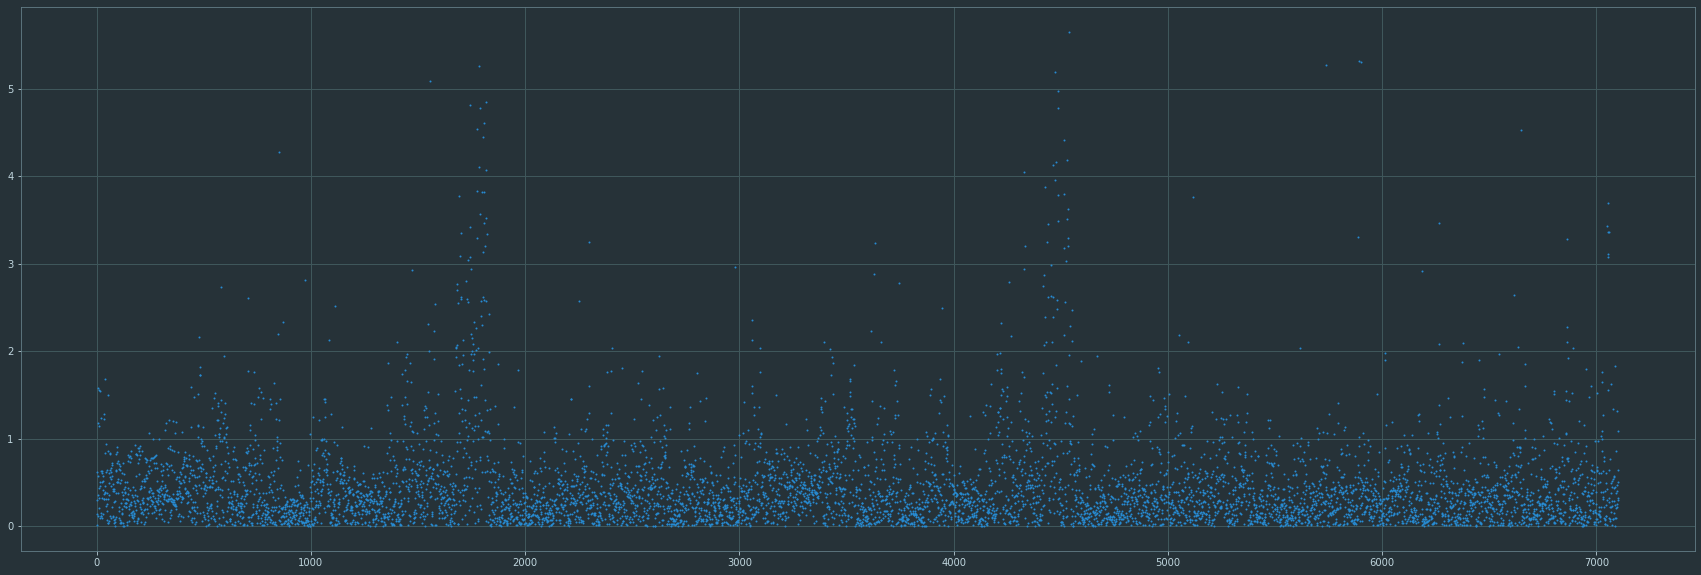

In [375]:
print(np.median(y), y.std())
plt.figure(figsize=(30, 10))
plt.scatter(range(len(y)), ((y-X.dot(w))**2)**.5, s=1)

In [13]:
fig, plts = plt.subplots(nrows=8, ncols=1, figsize=(30, 50))

plts[7].scatter(range(len(y)), y, s=25, alpha=.1)
plts[7].scatter(range(len(y)), X.dot(w), s=15, c="y", alpha=.1)

plts[0].scatter(range(1000), y[:1000], s=25)
plts[0].scatter(range(1000), X.dot(w)[:1000], s=10, c="y")

plts[1].scatter(range(1000), y[1000:2000], s=25)
plts[1].scatter(range(1000), X.dot(w)[1000:2000], s=10, c="y")



plts[2].scatter(range(1000), y[2000:3000], s=25)
plts[2].scatter(range(1000), X.dot(w)[2000:3000], s=10, c="y")

plts[3].scatter(range(1000), y[3000:4000], s=25)
plts[3].scatter(range(1000), X.dot(w)[3000:4000], s=10, c="y")

plts[4].scatter(range(1000), y[4000:5000], s=25)
plts[4].scatter(range(1000), X.dot(w)[4000:5000], s=10, c="y")

plts[5].scatter(range(1000), y[5000:6000], s=25)
plts[5].scatter(range(1000), X.dot(w)[5000:6000], s=10, c="y")

plts[6].scatter(range(len(y[6000:])), y[6000:], s=25)
plts[6].scatter(range(len(y[6000:])), X.dot(w)[6000:], s=10, c="y")

In [12]:
sum((X.dot(w)-y)**2)/len(y)

0.5005574238350695